<center> <h1> Data Analysis using <strong>ARIMA</h1> </center>

In this notebook, I will be using the ARIMA method to predict artificial data that I am going to create. ARIMA stands for Autoregressive Integrated Moving Average and contains **p, d, q** components in itself. First, it's required to install and import the necessary packages to create and model our data, and to calculate our model and then make predictions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [31]:
invest = pd.DataFrame(data=np.random.randint(size=148, low=1100, high=6350),
                      index=pd.date_range(name='Date', end="31-12-2023", freq="M", periods=148))


<ipython-input-31-88e1d900bae5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  invest = pd.DataFrame(data=np.random.randint(size=148, low=1100, high=6350), index=pd.date_range(name='Date', end="31-12-2023", freq="M", periods=148))


In [22]:
invest.head()

,Investment
Date,
2011-09-30,4201
2011-10-31,2299
2011-11-30,2015
2011-12-31,6212
2012-01-31,4662


In [23]:
invest.tail()

,Investment
Date,
2023-08-31,3445
2023-09-30,5280
2023-10-31,5259
2023-11-30,3010
2023-12-31,3196


In order to add some trend and seasonal components to our data we will use Pandas library's necessary functions.

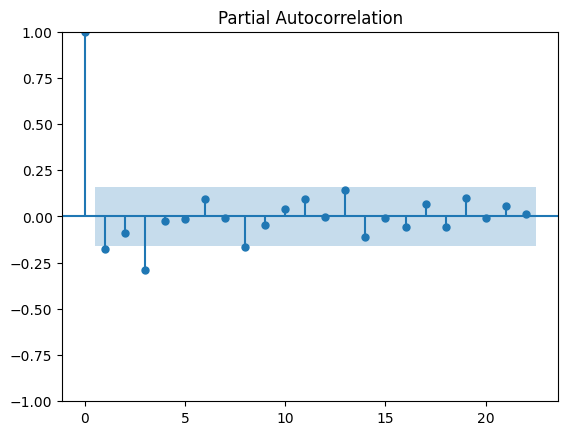

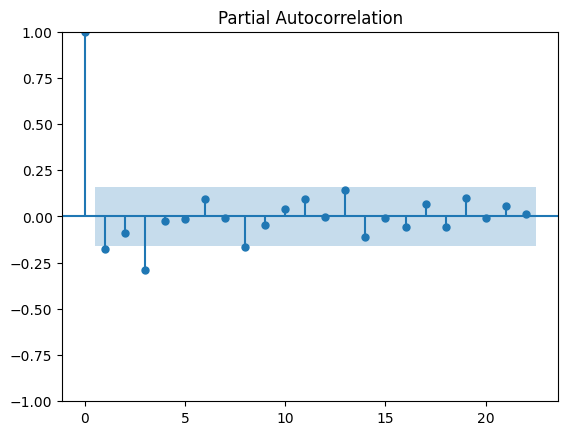

In [72]:
sm.graphics.tsa.plot_pacf(invest['Investment'])

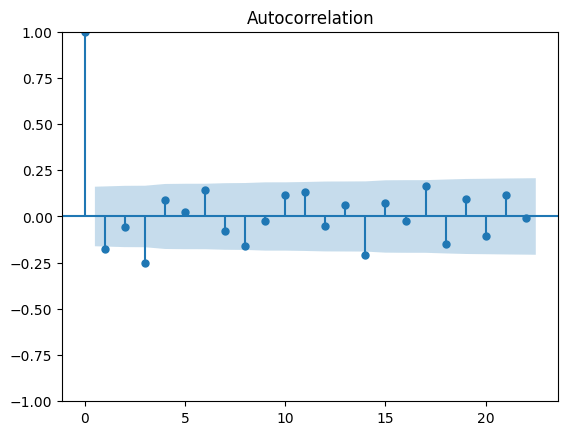

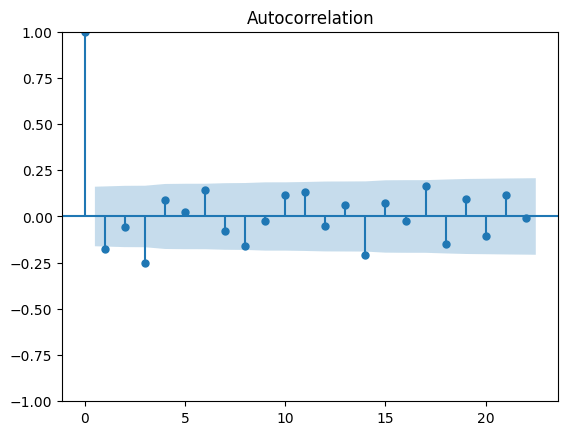

In [73]:
sm.graphics.tsa.plot_acf(invest['Investment'])

In [76]:
adftest, p_value, lags, so, df, critical = sm.tsa.adfuller(maxlag=15, x=invest.Investment)

In [93]:
print(p_value) 
#Just because the null hypothesis of the test is that there's a unit root if the p-value is less than 0.05 threshold
# we could reject the null hypothesis.

3.744864049507686e-18


Augmented Dickey-Fuller test of unit root shows that we can reject the null hypothesis that there's a unit root or non-stationarity in our data. Because the probability value of the test is so low, it wouldn't matter much to implement extra tests such as Phillips-Perron and KPSS tests. The reason for this is the fact that I created the data as a random sampling via NumPy's random module. 

And when we look at the partial autocorrelation graph, there isn't any significant point that needs to addressed through differencing. These imply that in our modelling we are not going to use of the **p, q, d** parameters and basically apply OLS to our data. 

In [157]:
model_arima = sm.tsa.ARIMA(invest, order=(3,0,0))
print(model_arima.fit().summary())

                               SARIMAX Results                                
Dep. Variable:             Investment   No. Observations:                  148
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1285.661
Date:                Tue, 30 Jan 2024   AIC                           2581.322
Time:                        11:46:58   BIC                           2596.308
Sample:                    09-30-2011   HQIC                          2587.411
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3858.6486     74.956     51.479      0.000    3711.738    4005.560
ar.L1         -0.2151      0.088     -2.451      0.014      -0.387      -0.043
ar.L2         -0.1462      0.078     -1.879      0.0

However, after looking at our Autocorrelation and Partial Autocorrolation Functions' we see that there's an impact of the third lag. Keeping this in mind we have implemented the ARIMA with the orders other than zeros and found the least possible Akaike and Schwarz criteria which occured when I put Autocorrolation element (**p**) equal to 3 and others (**d** and **q**) to 0.

In [160]:
model_arima_1 = sm.tsa.ARIMA(invest, order=(3,0,3))
model_arima_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Investment   No. Observations:                  148
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1283.825
Date:                Tue, 30 Jan 2024   AIC                           2583.651
Time:                        11:51:36   BIC                           2607.628
Sample:                    09-30-2011   HQIC                          2593.393
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3858.6486     89.413     43.155      0.000    3683.403    4033.894
ar.L1          0.0570      0.214      0.266      0.790      -0.362       0.476
ar.L2         -0.3079      0.193     -1.594      0.111      -0.686       0.071
ar.L3         -0.6196      0.179     -3.454      0.001      -0.971      -0.268
ma.L1         -0.2717      0.243     -1.119      0.263      -0.748       0.204
ma.L2          0.2853      0.250      1.143      0.253      -0.204       0.775
ma.L3          0.3751      0.216      1.740      0.082      -0.047       0.797
sigma2      1.951e+06   3.12e+05      6.249      0.000    1.34e+06    2.56e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 5.49
Prob(Q):                              0.85   Prob(JB):                         0.06
Heteroskedasticity (H):               0.94   Skew:                            -0.25
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now is the time to visualise our results and see how good a choice would ARIMA be with this type of dataset.

In [176]:
result = model_arima.fit()

In [192]:
fitted = result.predict()

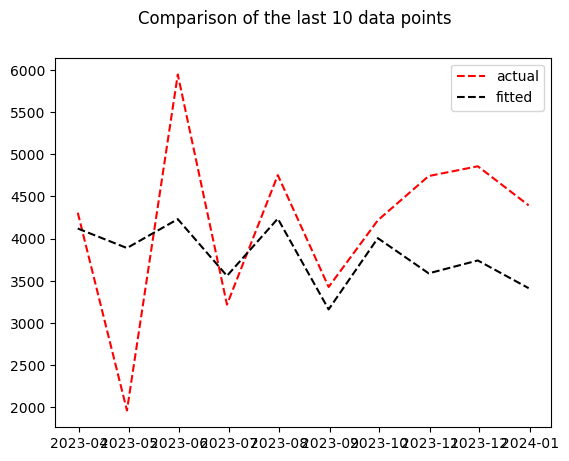

In [210]:
plt.plot(invest[138:], 'r--', fitted[138:], 'k--')
plt.suptitle("Comparison of the last 10 data points")
plt.legend(['actual', 'fitted'])

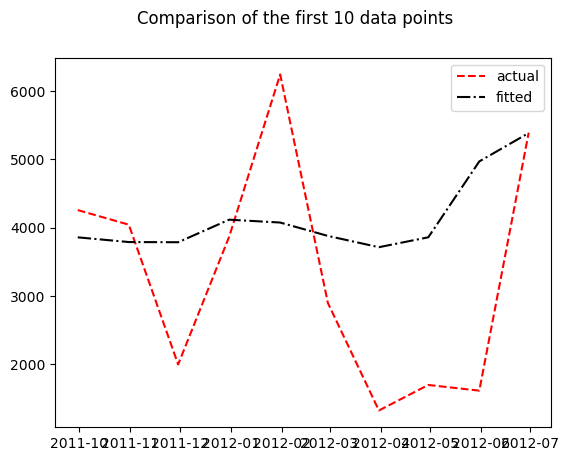

In [213]:
plt.plot(invest[:10], 'r--', fitted[:10], 'k-.')
plt.suptitle("Comparison of the first 10 data points")
plt.legend(['actual', 'fitted'])

<center><h4><strong> Conclusion </strong></h4></center>

After visualising the first and the last 10 data points and their calculated or <em> fitted </em> counterparts that we acquired by calling for ARIMA time series method, we make assumptions about how successful it accounts for and may be used for predicting future values with. Our graphs show that in general ARIMA catches the tendecy of the data but it is not the best of the models that we would use to predict the future. So it is recommended to use other econometric models to have a clearer view. Considering it is just a demo to check and showcase my aptness with econometrics and Python programming language, in my next notebooks I will continue to explore the unfathomable depths of data analytics.